In [31]:
import torch
import csv
import os
import cv2
import numpy as np
 
from torch import nn 
from icecream import ic


In [4]:
dataset = []
data_loc = "/Volumes/Nantha/Workspace/Datasets/Nanthak Dataset/"
labels = []
processed_videos = []
for folder in os.listdir(data_loc):
    if folder[0] != '.':
        for file in os.listdir(data_loc+folder):
            cap = cv2.VideoCapture(data_loc + folder + "/"+ file)

            name = file.split("_")
            if name[0] == 'v':
                tag = name[1].lower()
            else:
                tag = name[0].lower()
            

            w = 64
            fcount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            
            suc,frame = cap.read()
            if not suc:
                continue
            pframe = cv2.resize(frame,(w,w),0,0,cv2.INTER_CUBIC)
            pframe = cv2.cvtColor(pframe,cv2.COLOR_BGR2GRAY)
            all_frames = []

            for i in range(1,fcount):
                x,frame = cap.read()
                if not x:
                    continue
                frame = cv2.resize(frame,(w,w),0,0,cv2.INTER_CUBIC)
                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                diff = cv2.absdiff(frame,pframe)
                diff[diff<30] = 0
                count = np.count_nonzero(diff)
                if count > 10:
                    # cv2.imshow('frame',diff)
                    # if cv2.waitKey(1) & 0xFF == ord('q'): break 
                    all_frames.append(diff)
                pframe = frame
            # print(len(all_frames))
            reduced_frames = []
            req = 40
            
            i = 0.0
            if len(all_frames)>20:
                while i < len(all_frames) - len(all_frames)/req:
                    reduced_frames.append(all_frames[int(i)])
                    # cv2.imshow('frame',reduced_frames[-1])
                    # if cv2.waitKey(1) & 0xFF == ord('q'): break 
                    i += len(all_frames)/req
                
                while len(reduced_frames)< req:
                    reduced_frames.append(reduced_frames[-1])
                # print("Red ",len(reduced_frames))
                ic(len(reduced_frames))
                labels.append(tag)
                processed_videos.append(reduced_frames)
                break

ic(np.array(processed_videos).shape)

            

ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| np.array(processed_videos).shape: (25, 40, 64, 64)


(25, 40, 64, 64)

In [40]:
def transformY(y):
    av = list(set(labels))
    Y = []
    for x in y:
        Y.append(av.index(x))
    print(y)
    
    return np.array(Y)



In [6]:
Y = transformY(labels)
X = np.array(processed_videos)
X = X[:,np.newaxis,:,:,:]
print(X.shape,Y.shape)


['blackboard', 'blackboard', 'book', 'classroom', 'college', 'education', 'eraser', 'exam', 'fail', 'memorize', 'name', 'paper', 'pass', 'pen', 'pencil', 'picture', 'principal', 'result', 'scale', 'sentence', 'student', 'teacher', 'title', 'university', 'word']
(25, 1, 40, 64, 64) (25,)


In [7]:
X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y,dtype=torch.int64)
X.shape

torch.Size([25, 1, 40, 64, 64])

In [114]:

class Model(nn.Module):
    def __init__(self,nclasses):
        super(Model,self).__init__()

        self.m = nn.Conv3d(1,64,3,stride=1)
        self.m01 = nn.Conv3d(64,64,3,stride=1)
        self.p = nn.MaxPool3d((3,3,3),stride=2)

        self.m1 = nn.Conv3d(64,128,3,stride=1)
        self.m11 = nn.Conv3d(128,128,3,stride=1)
        self.p1 = nn.MaxPool3d((3,3,3),stride=3)
        self.m2 = nn.Conv3d(128,256,3,stride=1)
        self.m21 = nn.Conv3d(256,256,3,stride=1)
        self.p2 = nn.MaxPool3d((3,3,3),stride=2)
        
        encod = nn.TransformerEncoderLayer(d_model = 64,nhead=4)
        self.encoder = nn.TransformerEncoder(encod,num_layers=4)
        #if video length changed, the value below needs to be
        #changed
        vid_len = 30

        self.f1= nn.Linear(64*vid_len,48)
        self.f2 = nn.Linear(48,32)
        self.f3 = nn.Linear(32,nclasses)


    def forward(self,x):
        r = self.m(x)
        r = self.m01(r)
        r = self.p(r)
        r = self.m1(r)
        r = self.m11(r)
        r = self.p1(r)
        r = self.m2(r)
        r = self.m21(r)
        r = self.p2(r)
        print(r.shape)
        r = r.reshape((-1,30,64))
        r = self.encoder(r)

        r = r.reshape(x.shape[0],-1)
        
        r = nn.functional.relu(self.f1(r))
        r = nn.functional.relu(self.f2(r))
        r = nn.functional.softmax(self.f3(r),dim=-1)
        return r

# model = Model(25)
# print(X.shape)
# uuu = model(X)

del model


NameError: name 'model' is not defined

In [ ]:
from torch import nn 
from icecream import ic

class Model(nn.Module):
    def __init__(self,nclasses):
        super(Model,self).__init__()

        self.m = nn.Conv3d(1,64,3,stride=1)
        self.m01 = nn.Conv3d(64,64,3,stride=1)
        self.p = nn.MaxPool3d((3,3,3),stride=2)

        self.m1 = nn.Conv3d(64,128,3,stride=1)
        self.m11 = nn.Conv3d(128,128,3,stride=1)
        self.p1 = nn.MaxPool3d((3,3,3),stride=3)
        self.m2 = nn.Conv3d(128,256,3,stride=1)
        self.m21 = nn.Conv3d(256,256,3,stride=1)
        self.p2 = nn.MaxPool3d((3,3,3),stride=2)
        
        encod = nn.TransformerEncoderLayer(d_model = 64,nhead=4)
        self.encoder = nn.TransformerEncoder(encod,num_layers=4)
        #if video length changed, the value below needs to be
        #changed
        vid_len = 30

        self.f1= nn.Linear(64*vid_len,48)
        self.f2 = nn.Linear(48,32)
        self.f3 = nn.Linear(32,nclasses)


    def forward(self,x):
        r = self.m(x)
        r = self.m01(r)
        r = self.p(r)
        r = self.m1(r)
        r = self.m11(r)
        r = self.p1(r)
        r = self.m2(r)
        r = self.m21(r)
        r = self.p2(r)
        print(r.shape)
        r = r.reshape((-1,30,64))
        r = self.encoder(r)

        r = r.reshape(x.shape[0],-1)
        
        r = nn.functional.relu(self.f1(r))
        r = nn.functional.relu(self.f2(r))
        r = nn.functional.softmax(self.f3(r),dim=-1)
        return r

# model = Model(25)
# print(X.shape)
# uuu = model(X)

del model


In [112]:
del model
print(model)

NameError: name 'model' is not defined

In [104]:
optim = torch.optim.SGD(model.parameters(),lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()
h_loss = []
h_acc = []
for epoch in range(100):
    y = model(X)
    loss = loss_fn(y,Y)
    loss.backward()
    
    accuracy = (torch.argmax(y,-1)==Y).sum().float()/X.shape[0]
    ic(epoch,loss.item(),accuracy.item())
    h_loss.append(loss.item())
    h_acc.append(accuracy.item())
    
    optim.step()
    optim.zero_grad()


ic| epoch: 0
    loss.item(): 2.818617582321167
    accuracy.item(): 0.5199999809265137
ic| epoch: 1
    loss.item(): 2.814615249633789
    accuracy.item(): 0.5199999809265137
ic| epoch: 2
    loss.item(): 2.8134448528289795
    accuracy.item(): 0.5199999809265137
ic| epoch: 3
    loss.item(): 2.810781478881836
    accuracy.item(): 0.5199999809265137
ic| epoch: 4
    loss.item(): 2.8039608001708984
    accuracy.item(): 0.5199999809265137
ic| epoch: 5
    loss.item(): 2.8035478591918945
    accuracy.item(): 0.5199999809265137
ic| epoch: 6
    loss.item(): 2.79947566986084
    accuracy.item(): 0.5199999809265137
ic| epoch: 7
    loss.item(): 2.793727397918701
    accuracy.item(): 0.5199999809265137
ic| epoch: 8
    loss.item(): 2.7868170738220215
    accuracy.item(): 0.5199999809265137
ic| epoch: 9
    loss.item(): 2.7835144996643066
    accuracy.item(): 0.5199999809265137
ic| epoch: 10
    loss.item(): 2.7755613327026367
    accuracy.item(): 0.6000000238418579
ic| epoch: 11
    loss.ite

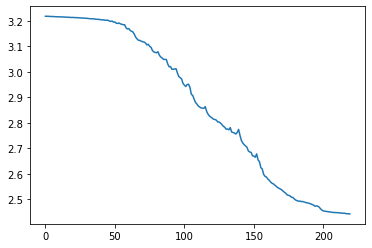

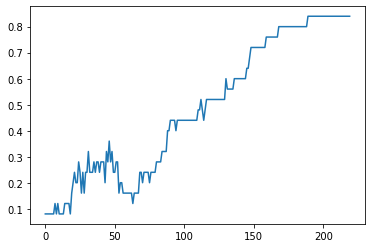

In [106]:
import matplotlib.pyplot as plt 
plt.plot(range(len(h_loss)),h_loss)
plt.show()
plt.plot(range(len(h_acc)),h_acc)
plt.show()

In [92]:
os.listdir("/Volumes/Nantha/Workspace/Datasets/Nanthak Dataset/")

['1b blackboard',
 '1 blackboard',
 '2 book',
 '3 classroom',
 '4 college',
 '5 education',
 '6 eraser',
 '7 exam',
 '8 fail',
 '9 memorize',
 '10 name',
 '11 paper',
 '12 pass',
 '13 pen',
 '14 pencil',
 '15 picture',
 '16 principal',
 '17 result',
 '18 scale',
 '19 sentence',
 '20 student',
 '21 teacher',
 '22 title',
 '23 university',
 '24 word']

In [35]:

class Model(nn.Module):
    def __init__(self,nclasses):
        super(Model,self).__init__()
        self.m = nn.Conv3d(1,20,3,stride=1)
        self.p = nn.MaxPool3d((3,3,3),stride=2)
        
        self.m1 = nn.Conv3d(20,30,3,stride=1)
        self.p1 = nn.MaxPool3d((3,3,3),stride=3)
        self.f_ch = 64
        self.m2 = nn.Conv3d(30,self.f_ch,3,stride=1)
        self.p2 = nn.MaxPool3d((3,3,3),stride=1)
        
        encod = nn.TransformerEncoderLayer(d_model = 256,nhead=4)
        self.encoder = nn.TransformerEncoder(encod,num_layers=4)
        #if video length changed, the value below needs to be
        #changed

        self.f1= nn.Linear(self.f_ch*256,64)
        self.f2 = nn.Linear(64,32)
        self.f3 = nn.Linear(32,nclasses)


    def forward(self,x):
        # r = self.m(x)
        # r = self.p(r)
        # r = self.m1(r)
        # r = self.p1(r)
        # r = self.m2(r)
        # r = self.p2(r)
        r = self.m(x)
        # r = self.m01(r)
        r = self.p(r)
        r = self.m1(r)
        r = self.p1(r)
        r = self.m2(r)
        r = self.p2(r)
        # print(r.shape)
        assert torch.numel(r)%(x.shape[0] * self.f_ch) == 0

        r = r.reshape((-1,self.f_ch,torch.numel(r)//(x.shape[0]*self.f_ch ) ))
        # print("after ",r.shape)
        # ic("Reshaped ",r.shape)
        r = self.encoder(r)
        # ic("Enc out",r.shape)
        r = r.reshape(x.shape[0],-1)
        
        r = nn.functional.relu(self.f1(r))
        r = nn.functional.relu(self.f2(r))
        r = nn.functional.softmax(self.f3(r),dim=-1)
        return r
    
gm = Model(25)
gm.load_state_dict(torch.load("../models/3dtrans.pt" map_location=torch.device('cpu')))
gm.eval()
1

1

In [92]:
# os.listdir("/Volumes/Nantha/Workspace/Datasets/Ram Dataset/")
dataset = []
data_loc = "/Volumes/Nantha/Workspace/Datasets/Ram Dataset"
labels = []
processed_videos = []
# for folder in os.listdir(data_loc):
#     if folder[0] != '.':
for file in os.listdir(data_loc):
    cap = cv2.VideoCapture(data_loc + "/"+ file)
    # cap = cv2.VideoCapture(data_loc + folder+ "/"+ file)
    name = file.split("_")
    if name[0] == 'v':
        tag = name[1].lower()
    else:
        tag = name[0].lower()
    

    w = 128
    fcount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    suc,frame = cap.read()
    if not suc:
        continue
    pframe = cv2.resize(frame,(w,w),0,0,cv2.INTER_CUBIC)
    pframe = cv2.cvtColor(pframe,cv2.COLOR_BGR2GRAY)
    all_frames = []

    for i in range(1,fcount):
        x,frame = cap.read()
        if not x:
            continue
        frame = cv2.resize(frame,(w,w),0,0,cv2.INTER_CUBIC)
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        diff = cv2.absdiff(frame,pframe)
        diff[diff<30] = 0
        count = np.count_nonzero(diff)
        if count > 10:
            # cv2.imshow('frame',diff)
            # if cv2.waitKey(1) & 0xFF == ord('q'): break 
            all_frames.append(diff)
        pframe = frame
    # print(len(all_frames))
    reduced_frames = []
    req = 40
    
    i = 0.0
    if len(all_frames)>20:
        while i < len(all_frames) - len(all_frames)/req:
            reduced_frames.append(all_frames[int(i)])
            # cv2.imshow('frame',reduced_frames[-1])
            # if cv2.waitKey(1) & 0xFF == ord('q'): break 
            i += len(all_frames)/req
        
        while len(reduced_frames)< req:
            reduced_frames.append(reduced_frames[-1])
        # print("Red ",len(reduced_frames))
        ic(len(reduced_frames))
        labels.append(tag)
        processed_videos.append(reduced_frames)

ic(np.array(processed_videos).shape)


ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_frames): 40
ic| len(reduced_fram

(74, 40, 128, 128)

In [93]:
mpp = {'blackboard': 7,
           'book': 13,
           'classroom': 17,
           'college': 23,
           'education': 16,
           'eraser': 4,
           'exam': 21,
           'fail': 22,
           'memorize': 19,
           'name': 1,
           'paper': 14,
           'pass': 12,
           'pen': 15,
           'pencil': 8,
           'picture': 18,
           'principal': 5,
           'result': 24,
           'scale': 3,
           'sentence': 2,
           'student': 0,
           'teacher': 11,
           'title': 10,
           'university': 20,
           'word': 9}
tY = []
ylable = []
X = []

for i in range(len(labels)):
    l = labels[i]
    if l in mpp.keys():
        tY.append(mpp[l])
        ylable.append(l)
        X.append(processed_videos[i])
    else:
        pass
for gg in zip(tY,ylable):
    print(gg)

X = np.array(X)
X = X[:,np.newaxis,:,:,:]
Y = np.array(tY)
print(X.shape,Y.shape)

# print(tY)
# print(ylable)

(5, 'principal')
(9, 'word')
(9, 'word')
(20, 'university')
(20, 'university')
(10, 'title')
(10, 'title')
(11, 'teacher')
(10, 'title')
(5, 'principal')
(9, 'word')
(11, 'teacher')
(0, 'student')
(2, 'sentence')
(2, 'sentence')
(0, 'student')
(3, 'scale')
(2, 'sentence')
(20, 'university')
(3, 'scale')
(11, 'teacher')
(0, 'student')
(24, 'result')
(24, 'result')
(18, 'picture')
(8, 'pencil')
(18, 'picture')
(15, 'pen')
(8, 'pencil')
(8, 'pencil')
(12, 'pass')
(15, 'pen')
(12, 'pass')
(12, 'pass')
(14, 'paper')
(1, 'name')
(14, 'paper')
(3, 'scale')
(15, 'pen')
(1, 'name')
(19, 'memorize')
(1, 'name')
(19, 'memorize')
(7, 'blackboard')
(22, 'fail')
(7, 'blackboard')
(7, 'blackboard')
(19, 'memorize')
(21, 'exam')
(21, 'exam')
(24, 'result')
(4, 'eraser')
(16, 'education')
(4, 'eraser')
(16, 'education')
(23, 'college')
(23, 'college')
(23, 'college')
(13, 'book')
(17, 'classroom')
(17, 'classroom')
(13, 'book')
(21, 'exam')
(22, 'fail')
(14, 'paper')
(5, 'principal')
(4, 'eraser')
(18,

In [94]:
X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y,dtype=torch.int64)



In [96]:
gm.eval()
ccountmp = {}
for i in range(0,70):
    res = torch.argmax(gm(X[i:i+1]),-1)
    print(labels[i],res.item())
    if res.item() in ccountmp.keys():
        ccountmp[res.item()]+=1
    else:
        ccountmp[res.item()] = 1
ccountmp
set(ccountmp)

file 23
file 12
principal 11
word 18
word 11
university 23
university 11
title 11
title 23
teacher 23
title 11
principal 18
word 9
teacher 18
student 18
sentence 18
sentence 13
student 18
scale 11
sentence 16
university 11
scale 9
teacher 8
student 8
result 12
result 21
picture 21
pencil 14
picture 23
file 11
pen 21
pencil 14
pencil 14
pass 13
pen 18
pass 21
pass 18
paper 16
name 6
paper 12
scale 6
pen 21
name 23
memorize 21
name 8
memorize 21
blackboard 21
fail 21
blackboard 23
blackboard 18
memorize 14
exam 22
exam 11
result 12
eraser 11
education 8
eraser 8
education 8
college 21
college 4
college 11
book 1
classroom 23
classroom 8
book 18
exam 23
fail 4
paper 11
principal 8
eraser 11


{1, 4, 6, 8, 9, 11, 12, 13, 14, 16, 18, 21, 22, 23}

In [ ]:
blackboard 18
blackboard 2
book 9
classroom 7
college 20
education 10
eraser 11
exam 0
fail 3
memorize 5
name 24
paper 18
pass 8
pen 14
pencil 14
picture 12
principal 1
result 19
scale 22
sentence 21
student 4
teacher 16
title 23
university 13
word 13